In [17]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

## Q1) SARSA

In [18]:
alpha = 0.4  # LR
gamma = 0.9  # Discount
epsilon = 0.9

env = gym.make('Taxi-v3')

# Q-table
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table_sarsa = np.zeros((state_space_size, action_space_size))
q_table_q_learning = np.zeros((state_space_size, action_space_size))
q_table_expected_sarsa = np.zeros((state_space_size, action_space_size))

def epsilon_greedy_policy(q_table, state, epsilon):
    if np.random.random() < epsilon:
        return np.random.choice(action_space_size)
    else:
        return np.argmax(q_table[state])

def sarsa(env, num_episodes, alpha, gamma, epsilon):
    rewards = []

    for episode in range(num_episodes):
        state, info = env.reset()
        action = epsilon_greedy_policy(q_table_sarsa, state, epsilon)
        episode_reward = 0

        while True:
            next_state, reward, done, _, _ = env.step(action)
            next_action = epsilon_greedy_policy(q_table_sarsa, next_state, epsilon)

            q_table_sarsa[state][action] += alpha * (reward + gamma * q_table_sarsa[next_state][next_action] - q_table_sarsa[state][action])
            episode_reward += reward

            if done:
                break
            state = next_state
            action = next_action

        rewards.append(episode_reward)

    return rewards

sarsa_rewards = sarsa(env, 2000, alpha, gamma, epsilon)


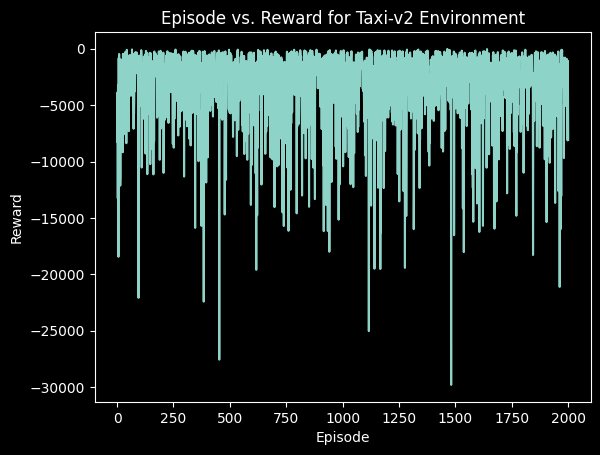

In [24]:
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode vs. Reward for Taxi-v2 Environment')
plt.plot(range(1, 2001), sarsa_rewards, label='SARSA')


## Q2) Q-Learning

In [20]:
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    rewards = []

    for episode in range(num_episodes):
        state, info = env.reset()
        episode_reward = 0

        while True:
            action = epsilon_greedy_policy(q_table_q_learning, state, epsilon)
            next_state, reward, done, _, _ = env.step(action)

            q_table_q_learning[state][action] += alpha * (reward + gamma * np.max(q_table_q_learning[next_state]) - q_table_q_learning[state][action])
            episode_reward += reward

            if done:
                break
            state = next_state

        rewards.append(episode_reward)

    return rewards

# Run Q-Learning
q_learning_rewards = q_learning(env, 2000, alpha, gamma, epsilon)


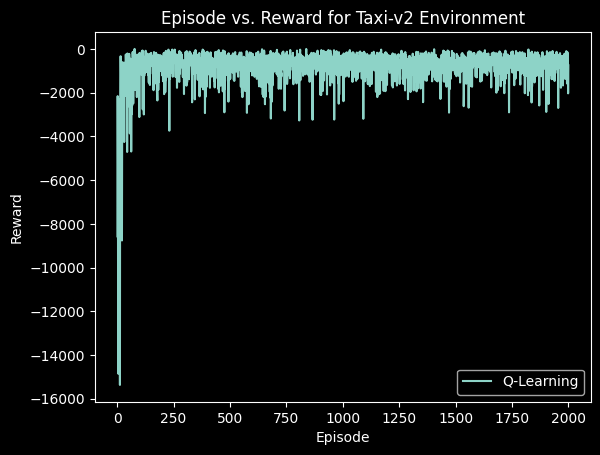

In [21]:
plt.plot(range(1, 2001), q_learning_rewards, label='Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode vs. Reward for Taxi-v2 Environment')
plt.legend()
plt.show()

## Q3) Expected SARSA

In [22]:

def expected_sarsa(env, num_episodes, alpha, gamma, epsilon):
    rewards = []
    for episode in range(num_episodes):
        state, info = env.reset()
        episode_reward = 0

        while True:
            action = epsilon_greedy_policy(q_table_expected_sarsa, state, epsilon)
            next_state, reward, done, _, _ = env.step(action)

            next_action_probs = np.ones(action_space_size) * epsilon / action_space_size
            next_action_probs[np.argmax(q_table_expected_sarsa[next_state])] += (1.0 - epsilon)
            expected_next_q_value = np.sum(next_action_probs * q_table_expected_sarsa[next_state])

            q_table_expected_sarsa[state][action] += alpha * (reward + gamma * expected_next_q_value - q_table_expected_sarsa[state][action])

            episode_reward += reward

            if done:
                break
            state = next_state

        rewards.append(episode_reward)

    return rewards

expected_sarsa_rewards = expected_sarsa(env, 2000, alpha, gamma, epsilon)


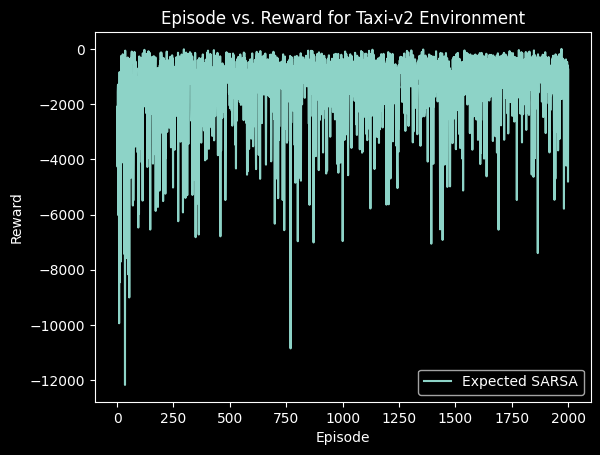

In [23]:
plt.plot(range(1, 2001), expected_sarsa_rewards, label='Expected SARSA')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode vs. Reward for Taxi-v2 Environment')
plt.legend()
plt.show()

From the graphs we see that Q-Learning performs the best with the highest reward. Expected SARSA is the next best and SARSA being the worst of the three.